In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement =Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date



('2017-08-23',)

Last Year Date: 2016-08-23


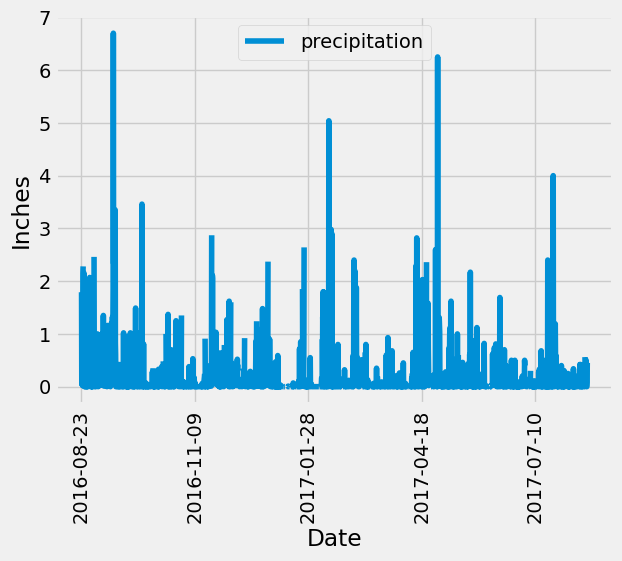

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

last_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Last Year Date:", last_year_date)

# Perform a query to retrieve the data and precipitation scores


last_year_data = session.query(Measurement.date,Measurement.prcp). \
    filter(Measurement.date >= last_year_date)



# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year_data , columns=['date','precipitation'])
df.head(10)
# Sort the dataframe by date

sorted_df = df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(x='date',y='precipitation',rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations


[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
summary_data = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
summary_data

[(54.0, 85.0, 71.66378066378067)]

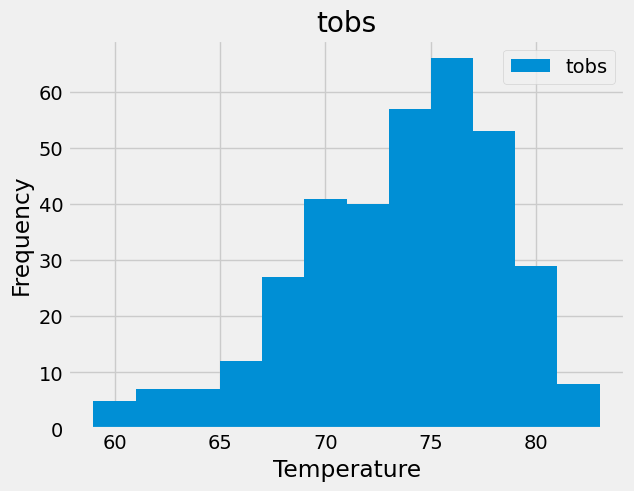

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date 12 months ago from the current date
tobs_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >=last_year_date).all()
tobs_data

df_tobs = pd.DataFrame(tobs_data)
df_tobs.head()

# Create a histogram plot
df_tobs.hist(bins=12 , legend = True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [17]:
# Close Session
session.close()